# Nelder-Mead Method

Copyright (C) 2022 François Chollet, derived from [this code](https://github.com/fchollet/nelder-mead/blob/c3022410201c9e09d9fbb091c2f458c7126ec610/nelder_mead.py)<br>
Copyright (C) 2022 Andreas Kloeckner

<details>
<summary>Licensed under the GNU General Public License Version 2</summary>
</details>

Resources:
- [Nelder-Mead method](https://en.wikipedia.org/wiki/Nelder–Mead_method) (Wikipedia)

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import copy

This is a challenge problem for optimization algorithms known as [Rosenbrock's banana function](https://en.wikipedia.org/wiki/Rosenbrock_function).

In [112]:
def f(X):
    x = X[0]
    y = X[1]
    val = 100.0 * (y - x**2)**2 + (1.0 - x)**2
    return val

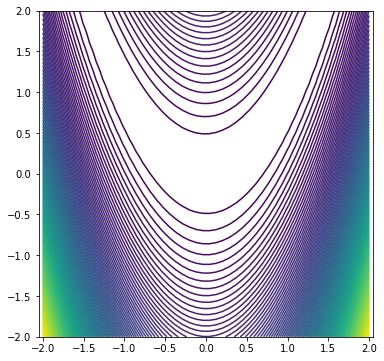

In [113]:
fig = plt.figure(figsize=(6, 6))

xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f(np.array([xmesh, ymesh]))

plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh, 150)

Set the starting guess:

In [114]:
x_start = np.array([2, 2./5])

Set some parameters:

In [115]:
step = 0.1
alpha = 1.
gamma = 2.
rho = -0.5
sigma = 0.5

Some initialization:

In [116]:
dim = len(x_start)
prev_best = f(x_start)
no_improv = 0
res = [[x_start, prev_best]]

for i in range(dim):
    x = copy.copy(x_start)
    x[i] = x[i] + step
    score = f(x)
    res.append([x, score])

And the iteration:

In [117]:
def iteration(res):
    res = res[:]
    
    # order
    res.sort(key=lambda x: x[1])
    best = res[0][1]

    # centroid
    x0 = [0.] * dim
    for tup in res[:-1]:
        for i, c in enumerate(tup[0]):
            x0[i] += c / (len(res)-1)

    # reflection
    xr = x0 + alpha*(x0 - res[-1][0])
    rscore = f(xr)
    if res[0][1] <= rscore < res[-2][1]:
        del res[-1]
        res.append([xr, rscore])
        return res

    # expansion
    if rscore < res[0][1]:
        xe = x0 + gamma*(x0 - res[-1][0])
        escore = f(xe)
        if escore < rscore:
            del res[-1]
            res.append([xe, escore])
            return res
        else:
            del res[-1]
            res.append([xr, rscore])
            return res

    # contraction
    xc = x0 + rho*(x0 - res[-1][0])
    cscore = f(xc)
    if cscore < res[-1][1]:
        del res[-1]
        res.append([xc, cscore])
        return res

    # reduction
    x1 = res[0][0]
    nres = []
    for tup in res:
        redx = x1 + sigma*(tup[0] - x1)
        score = f(redx)
        nres.append([redx, score])
    return nres

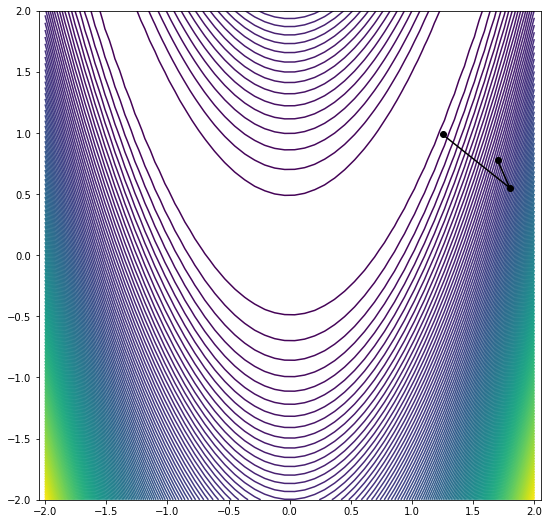

In [120]:
res = iteration(res)

fig = plt.figure(figsize=(9, 9))

xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f(np.array([xmesh, ymesh]))

plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh, 150)

pts = np.array([pt for pt, val in res]).T
plt.plot(pts[0], pts[1], "ko-")